In [11]:
import sqlite3


conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sales_data = [
    ("Laptop", 3, 50000),
    ("Laptop", 2, 52000),
    ("Mouse", 10, 500),
    ("Keyboard", 5, 1500),
    ("Monitor", 4, 12000),
    ("Monitor", 2, 12500),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()
conn.close()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


conn = sqlite3.connect("sales_data.db")


query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
conn.close()


print("Sales Summary:\n", df)


Sales Summary:
     product  total_qty    revenue
0  Keyboard         30    45000.0
1    Laptop         30  1524000.0
2   Monitor         36   438000.0
3     Mouse         60    30000.0


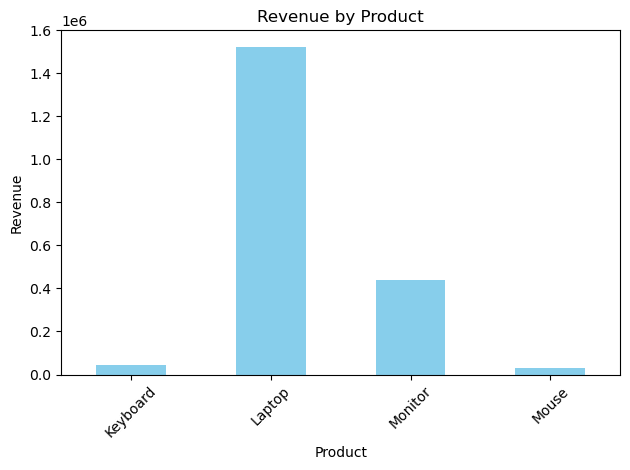

In [15]:

df.plot(kind="bar", x="product", y="revenue", legend=False, color="skyblue")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
